<a href="https://colab.research.google.com/github/Srishtijais16/step_demo/blob/day3/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
prices = pd.read_csv('/content/FB-stock-prices.csv')

In [ ]:
prices.head()


,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [ ]:
prices.dtypes

,0
Date,object
Price,int64


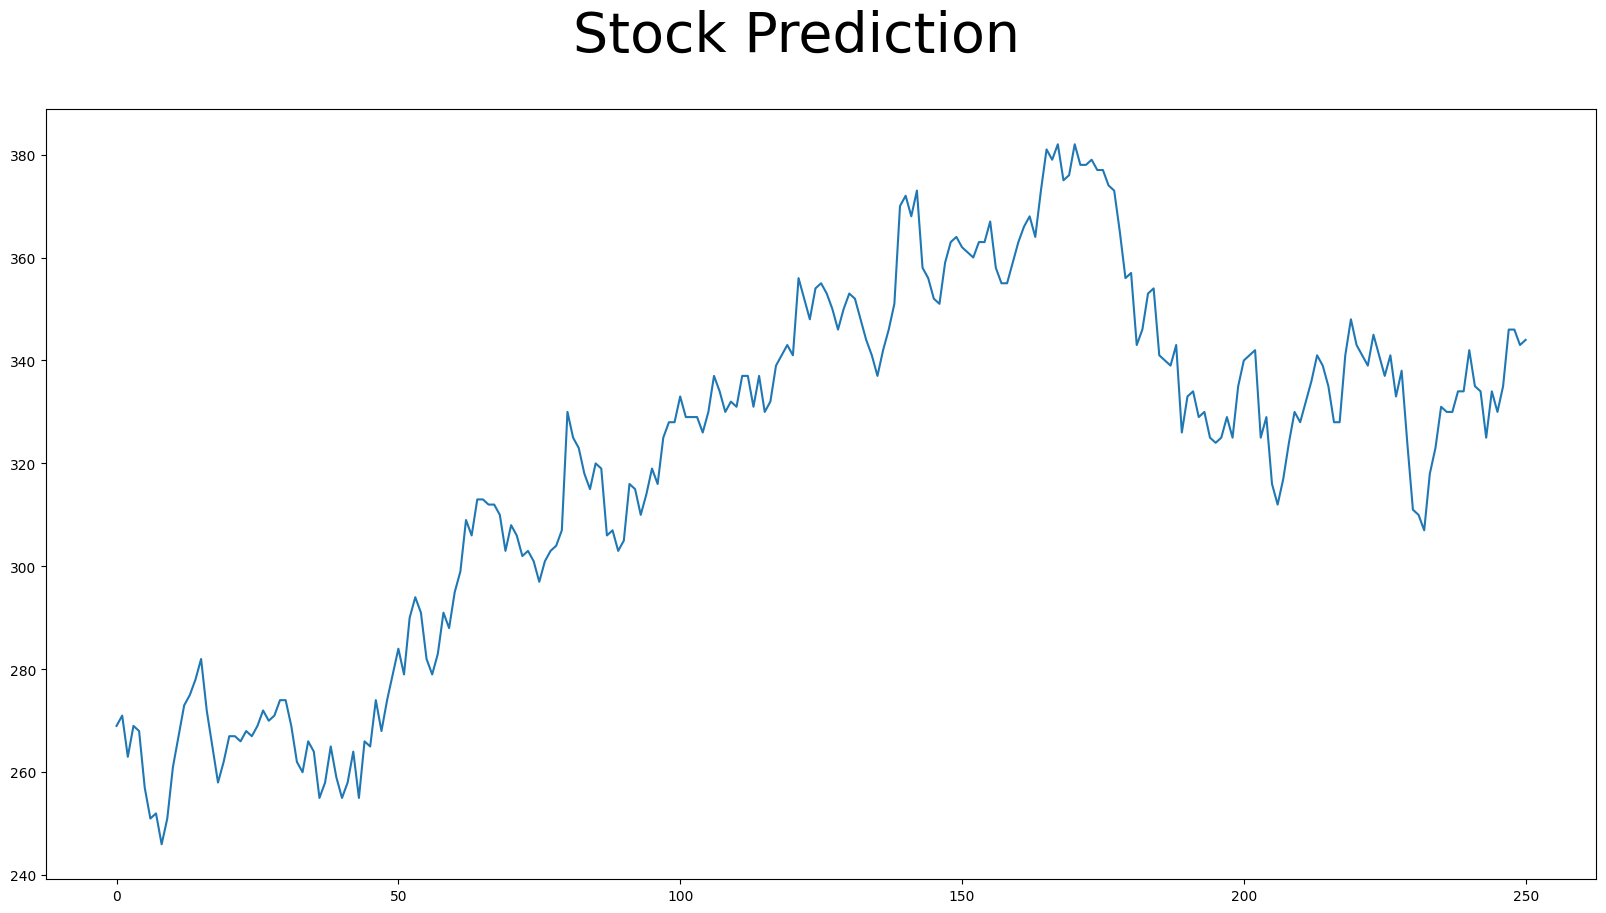

In [ ]:
fig=plt.figure(figsize=(20,10))
fig.suptitle("Stock Prediction",fontsize=40)
plt.plot(prices['Price'])
plt.show()

In [ ]:
prices.count()

,0
Date,251
Price,251


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_prices=scaler.fit_transform(prices[["Price"]].values)
print(scaled_prices)

[[-1.49673154]
 [-1.4393189 ]
 [-1.66896946]
 [-1.49673154]
 [-1.52543786]
 [-1.84120738]
 [-2.01344531]
 [-1.98473899]
 [-2.15697691]
 [-2.01344531]
 [-1.7263821 ]
 [-1.55414418]
 [-1.38190626]
 [-1.32449362]
 [-1.23837465]
 [-1.12354937]
 [-1.41061258]
 [-1.61155682]
 [-1.81250106]
 [-1.69767578]
 [-1.55414418]
 [-1.55414418]
 [-1.5828505 ]
 [-1.52543786]
 [-1.55414418]
 [-1.49673154]
 [-1.41061258]
 [-1.46802522]
 [-1.4393189 ]
 [-1.35319994]
 [-1.35319994]
 [-1.49673154]
 [-1.69767578]
 [-1.75508842]
 [-1.5828505 ]
 [-1.64026314]
 [-1.89862003]
 [-1.81250106]
 [-1.61155682]
 [-1.78379474]
 [-1.89862003]
 [-1.81250106]
 [-1.64026314]
 [-1.89862003]
 [-1.5828505 ]
 [-1.61155682]
 [-1.35319994]
 [-1.52543786]
 [-1.35319994]
 [-1.20966833]
 [-1.06613673]
 [-1.20966833]
 [-0.89389881]
 [-0.77907353]
 [-0.86519249]
 [-1.12354937]
 [-1.20966833]
 [-1.09484305]
 [-0.86519249]
 [-0.95131145]
 [-0.75036721]
 [-0.63554192]
 [-0.34847872]
 [-0.43459768]
 [-0.23365344]
 [-0.23365344]
 [-0.26235

In [ ]:
total_size = len(scaled_prices)
test_size = 50
train_size = total_size - test_size
print(total_size)
print(test_size)
print(train_size)

251
50
201


In [ ]:
training_prices = scaled_prices[:train_size]
test_prices = scaled_prices[train_size:]
print(training_prices.shape)

(201, 1)


In [ ]:
def create_rnn_dataset(data,lookback=1):
  data_x =[]
  data_y = []
  for i in range(len(data)-lookback-1):
    a = data[i:(i+lookback),0]
    data_x.append(a)
    data_y.append(data[i+lookback,0])
  return np.array(data_x),np.array(data_y)


In [ ]:
lookback=25
train_req_x,train_req_y = create_rnn_dataset(training_prices,lookback)

In [ ]:
train_req_x.shape

(175, 25)

In [ ]:
train_req_x

array([[-1.49673154, -1.4393189 , -1.66896946, ..., -1.5828505 ,
        -1.52543786, -1.55414418],
       [-1.4393189 , -1.66896946, -1.49673154, ..., -1.52543786,
        -1.55414418, -1.49673154],
       [-1.66896946, -1.49673154, -1.52543786, ..., -1.55414418,
        -1.49673154, -1.41061258],
       ...,
       [ 1.63225739,  1.66096372,  1.60355107, ...,  0.11082241,
         0.08211609,  0.11082241],
       [ 1.66096372,  1.60355107,  1.60355107, ...,  0.08211609,
         0.11082241,  0.22564769],
       [ 1.60355107,  1.60355107,  1.51743211, ...,  0.11082241,
         0.22564769,  0.11082241]])

In [ ]:
train_req_y.shape

(175,)

In [ ]:
train_req_x = np.reshape(train_req_x,(train_req_x.shape[0],train_req_x.shape[1],1))
print(train_req_x.shape)

(175, 25, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
import tensorflow as tf

In [ ]:
price_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Change the input_shape to (lookback, 1) to match the shape of your training data
price_model = Sequential()
price_model.add(SimpleRNN(32, input_shape=(lookback, 1))) # Changed input_shape
price_model.add(Dense(1))
price_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
price_model.fit(train_req_x,train_req_y, epochs=5, batch_size=5, verbose=1)


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mse: 0.0502
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mse: 0.0467
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mse: 0.0572
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0437 - mse: 0.0437
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0476 - mse: 0.0476


In [ ]:
test_req_x,test_req_y = create_rnn_dataset(test_prices,lookback)
text_req_x = np.reshape(test_req_x,(test_req_x.shape[0],test_req_x.shape[1],1))

In [ ]:
predict_on_test = price_model.predict(text_req_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [ ]:
price_model.evaluate(text_req_x,test_req_y,verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - loss: 0.1924 - mse: 0.1924


[0.1923864632844925, 0.1923864632844925]

In [ ]:
predicted_values= scaler.inverse_transform(predict_on_test)
print(predicted_values)

[[341.24686]
 [338.62878]
 [344.02283]
 [341.07474]
 [342.85864]
 [327.95374]
 [311.54276]
 [314.20343]
 [315.73615]
 [323.17105]
 [331.87006]
 [334.461  ]
 [335.30484]
 [328.50116]
 [333.93542]
 [335.9886 ]
 [341.34186]
 [341.11426]
 [331.7598 ]
 [328.10663]
 [329.41373]
 [331.15533]
 [330.83295]
 [340.81006]]


##PREDICTIONS

In [ ]:
prev_prices = np.array([324,356,456,398,461,345,401,344,324,356,456,398,461,345,401,344,444,324,356,456,398,481,345,401,344])
scaled_prices = scaler.transform(prev_prices.reshape(-1,1))
model_input=np.reshape(scaled_prices,(scaled_prices.shape[1],1,scaled_prices.shape[0]))
pred = price_model.predict(model_input)
stock_pred=scaler.inverse_transform(pred)
print(stock_pred)


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/simple_rnn_1_1/while/simple_rnn_cell_1/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-45-ea9c8bc4ef1f>", line 4, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 212, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 560, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/simple_rnn.py", line 354, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py", line 406, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py", line 346, in inner_loop

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 428, in rnn

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 411, in _step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py", line 338, in step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/simple_rnn.py", line 162, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 3445, in matmul

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

Matrix size-incompatible: In[0]: [1,25], In[1]: [1,32]
	 [[{{node sequential_1_1/simple_rnn_1_1/while/simple_rnn_cell_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_4600]

In [ ]:
prev_prices = np.array([324,356,456,398,461,345,401,344,324,356,456,398,461,345,401,344,444,324,356,456,398,481,345,401,344])
scaled_prices = scaler.transform(prev_prices.reshape(-1,1))
# Reshape to (1, lookback, 1) - 1 sample, 25 timesteps, 1 feature
model_input=np.reshape(scaled_prices,(1, scaled_prices.shape[0], 1))
pred = price_model.predict(model_input)
stock_pred=scaler.inverse_transform(pred)
print(stock_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[362.61478]]
